In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = "//content/drive/MyDrive/Assignment_HOOM/"

In [ ]:
df = pd.read_csv(dir + 'MORTGAGE30US.csv')
df

,DATE,MORTGAGE30US
0,2000-01-07,8.15
1,2000-01-14,8.18
2,2000-01-21,8.26
3,2000-01-28,8.25
4,2000-02-04,8.25
...,...,...
1177,2022-07-28,5.30
1178,2022-08-04,4.99
1179,2022-08-11,5.22
1180,2022-08-18,5.13


In [ ]:
df.rename(columns = {'MORTGAGE30US' : 'MORTGAGE'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      1182 non-null   object 
 1   MORTGAGE  1182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 18.6+ KB


In [ ]:
df.isnull().sum()

DATE        0
MORTGAGE    0
dtype: int64

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      1182 non-null   datetime64[ns]
 1   MORTGAGE  1182 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 18.6 KB


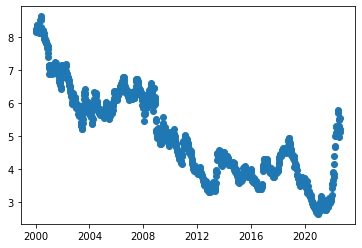

In [ ]:
plt.scatter(df.DATE, df.MORTGAGE)
plt.show()

In [ ]:
from scipy import stats
import numpy as np
df[(np.abs(stats.zscore(df['MORTGAGE'])) > 3)]

,DATE,MORTGAGE


In [ ]:
q_low = df["MORTGAGE"].quantile(0.01)
q_hi  = df["MORTGAGE"].quantile(0.99)
print(q_low, q_hi)

df_outlier = df[(df["MORTGAGE"] > q_hi) | (df["MORTGAGE"] < q_low) ]
df_outlier

2.77 8.25


,DATE,MORTGAGE
2,2000-01-21,8.26
5,2000-02-11,8.36
6,2000-02-18,8.38
7,2000-02-25,8.31
8,2000-03-03,8.27
17,2000-05-05,8.28
18,2000-05-12,8.52
19,2000-05-19,8.64
20,2000-05-26,8.62
21,2000-06-02,8.54


In [23]:
average = df.groupby(pd.PeriodIndex(df['DATE'], freq = "M"))['MORTGAGE'].mean()
average = average.to_frame()
average

,MORTGAGE
DATE,
2000-01,8.2100
2000-02,8.3250
2000-03,8.2400
2000-04,8.1525
2000-05,8.5150
...,...
2022-04,4.9825
2022-05,5.2300
2022-06,5.5220


In [24]:
average = average.reset_index()

In [25]:
average['DATE'] = average['DATE'].astype(str)
average['DATE'] = pd.to_datetime(average['DATE'])
average

,DATE,MORTGAGE
0,2000-01-01,8.2100
1,2000-02-01,8.3250
2,2000-03-01,8.2400
3,2000-04-01,8.1525
4,2000-05-01,8.5150
...,...,...
267,2022-04-01,4.9825
268,2022-05-01,5.2300
269,2022-06-01,5.5220
270,2022-07-01,5.4125


In [ ]:
average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DATE      272 non-null    datetime64[ns]
 1   MORTGAGE  272 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.4 KB


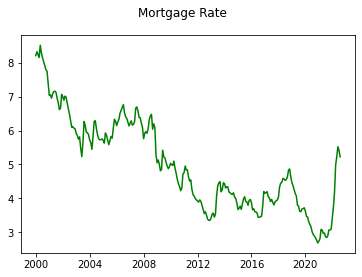

In [26]:
plt.plot(average['DATE'], average['MORTGAGE'], "g-")

plt.suptitle("Mortgage Rate")
plt.show()

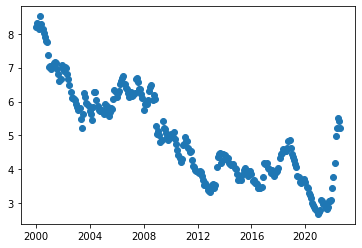

In [27]:
plt.scatter(average.DATE, average.MORTGAGE)
plt.show()

In [28]:
from scipy import stats
import numpy as np
average[(np.abs(stats.zscore(average['MORTGAGE'])) > 3)]

,DATE,MORTGAGE


In [29]:
average.set_index(['DATE'], inplace = True)
average

,MORTGAGE
DATE,
2000-01-01,8.2100
2000-02-01,8.3250
2000-03-01,8.2400
2000-04-01,8.1525
2000-05-01,8.5150
...,...
2022-04-01,4.9825
2022-05-01,5.2300
2022-06-01,5.5220


In [30]:
average.to_csv('mortgage_rate_final.csv')